In [2]:
import glob
import datetime as dt

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
dfs = []
for fname in glob.glob('../data/gamethreads/*.pkl.gz'):
    with open(fname, 'rb') as fid:
        df = pd.read_pickle(fid, compression='gzip')
    dfs.append(df)
df = pd.concat(dfs)
print(df.shape)
df.head()

(5630, 114)


,_reddit,approved_at_utc,subreddit,selftext,user_reports,saved,mod_reason_title,gilded,clicked,title,...,_comments_by_id,author_fullname,author_premium,author_flair_richtext,post_hint,author_flair_type,preview,author_patreon_flair,link_flair_template_id,author_cakeday
0,<praw.reddit.Reddit object at 0x7f3b2c26e150>,None,CollegeBasketball,[deleted],[],False,None,0,False,[Post Game Thread] San Jose State defeats Gram...,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,<praw.reddit.Reddit object at 0x7f3b2c26e150>,None,CollegeBasketball,[Box Score](https://www.espn.com/mens-college-...,[],False,None,0,False,[Post Game Thread] St. Mary's defeats Fresno S...,...,{},t2_14knm6,False,"[{'e': 'text', 't': 'Gonzaga Bulldogs'}]",self,richtext,{'images': [{'source': {'url': 'https://extern...,False,NaN,NaN
2,<praw.reddit.Reddit object at 0x7f3b2c26e150>,None,CollegeBasketball,[Box Score] (https://www.espn.com/mens-college...,[],False,None,0,False,[Post Game Thread] San Diego State defeats San...,...,{},t2_koc5z,False,[],NaN,text,NaN,False,NaN,NaN
3,<praw.reddit.Reddit object at 0x7f3b2c26e150>,None,CollegeBasketball,https://www.espn.com/mens-college-basketball/b...,[],False,None,0,False,[Post Game Thread] Chicago State defeats North...,...,{},t2_51xh13ld,False,"[{'e': 'text', 't': 'Chicago State Cougars'}]",self,richtext,{'images': [{'source': {'url': 'https://extern...,False,NaN,NaN
4,<praw.reddit.Reddit object at 0x7f3b2c26e150>,None,CollegeBasketball,[removed],[],False,None,0,False,[Post Game Thread] Chicago State defeats North...,...,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df["timestamp"] = df.created.apply(lambda x:dt.datetime.fromtimestamp(x)-dt.timedelta(hours=5))
df["is_post"] = df.title.apply(lambda x:"post " in x.lower())
df.sort_values("timestamp", inplace=True)
df[["timestamp","id","title","is_post","ups","num_comments"]].head(20)

,timestamp,id,title,is_post,ups,num_comments
49,2019-11-06 11:45:49,dsh9ec,"[Post Game Thread] Cornell defeats Binghamton,...",True,4,15
48,2019-11-06 19:48:17,dso2yc,[Game Thread] Wake Forest @ Boston College (6:...,False,5,52
47,2019-11-06 19:50:30,dso403,[Game Thread] IUPUI @ Butler (6:30 PM ET),False,5,17
46,2019-11-06 20:10:30,dsodtm,[Game Thread] Green Bay @ #18 Purdue (7:00 PM ET),False,37,321
45,2019-11-06 20:28:19,dsom71,[Game Thread] Mercer @ St. John's (6:30 PM ET),False,8,52
44,2019-11-06 20:52:32,dsoxm1,[Game Thread] Notre Dame @ #7 North Carolina (...,False,63,687
43,2019-11-06 21:00:37,dsp1g1,[Game Thread] Merrimack @ Maine (7:00 PM ET),False,3,5
42,2019-11-06 21:10:44,dsp5xl,[Game Thread] Hiram @ Kent State (7:00 PM ET),False,3,1
41,2019-11-06 21:12:39,dsp6zj,[Game Thread] Oral Roberts @ Oklahoma State (8...,False,24,31
40,2019-11-06 21:20:45,dspaoi,[Game Thread] Brewton-Parker @ Georgia State (...,False,3,5


In [5]:
df["timestamp"] = df.created.apply(lambda x:dt.datetime.fromtimestamp(x)-dt.timedelta(hours=10))
print(df.shape)
df[["timestamp","id","title","ups","num_comments"]].head()

(5630, 116)


,timestamp,id,title,ups,num_comments
49,2019-11-06 06:45:49,dsh9ec,"[Post Game Thread] Cornell defeats Binghamton,...",4,15
48,2019-11-06 14:48:17,dso2yc,[Game Thread] Wake Forest @ Boston College (6:...,5,52
47,2019-11-06 14:50:30,dso403,[Game Thread] IUPUI @ Butler (6:30 PM ET),5,17
46,2019-11-06 15:10:30,dsodtm,[Game Thread] Green Bay @ #18 Purdue (7:00 PM ET),37,321
45,2019-11-06 15:28:19,dsom71,[Game Thread] Mercer @ St. John's (6:30 PM ET),8,52


NameError: name 'xs' is not defined

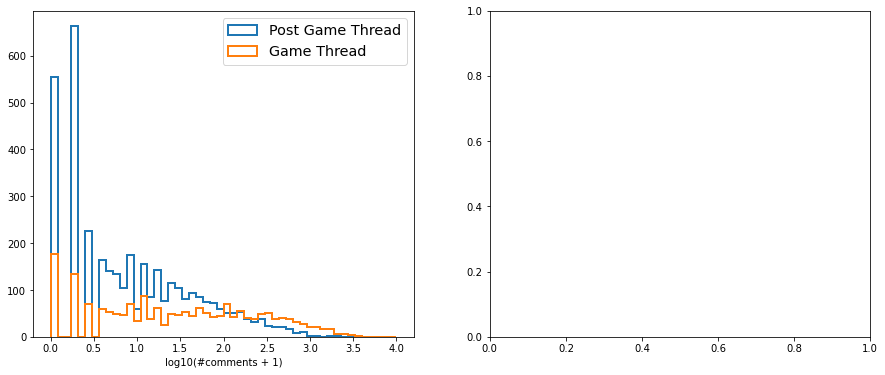

In [9]:
from sklearn.linear_model import LinearRegression

fig, axs = plt.subplots(1,2,figsize=(15,6))
axs[0].hist(np.log10(df.loc[df.is_post].num_comments.values+1), bins=np.linspace(0,4,51), histtype='step', lw=2, label="Post Game Thread")
axs[0].hist(np.log10(df.loc[~df.is_post].num_comments.values+1), bins=np.linspace(0,4,51), histtype='step', lw=2, label="Game Thread")
axs[0].legend(fontsize='x-large')
axs[0].set_xlabel("log10(#comments + 1)")
axs[1].scatter